C:\Users\haris\AppData\Local\Temp\ipykernel_19660\1958037405.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
C:\Users\haris\AppData\Local\Temp\ipykernel_19660\1958037405.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


1       0
2       0
3       0
4       0
5       0
       ..
2188    1
2189    1
2190    1
2191    1
2192    1
Name: class_label, Length: 2192, dtype: int64
Accuracy: 0.6625
              precision    recall  f1-score   support

           0       0.63      0.80      0.70        40
           1       0.72      0.53      0.61        40

    accuracy                           0.66        80
   macro avg       0.68      0.66      0.66        80
weighted avg       0.68      0.66      0.66        80



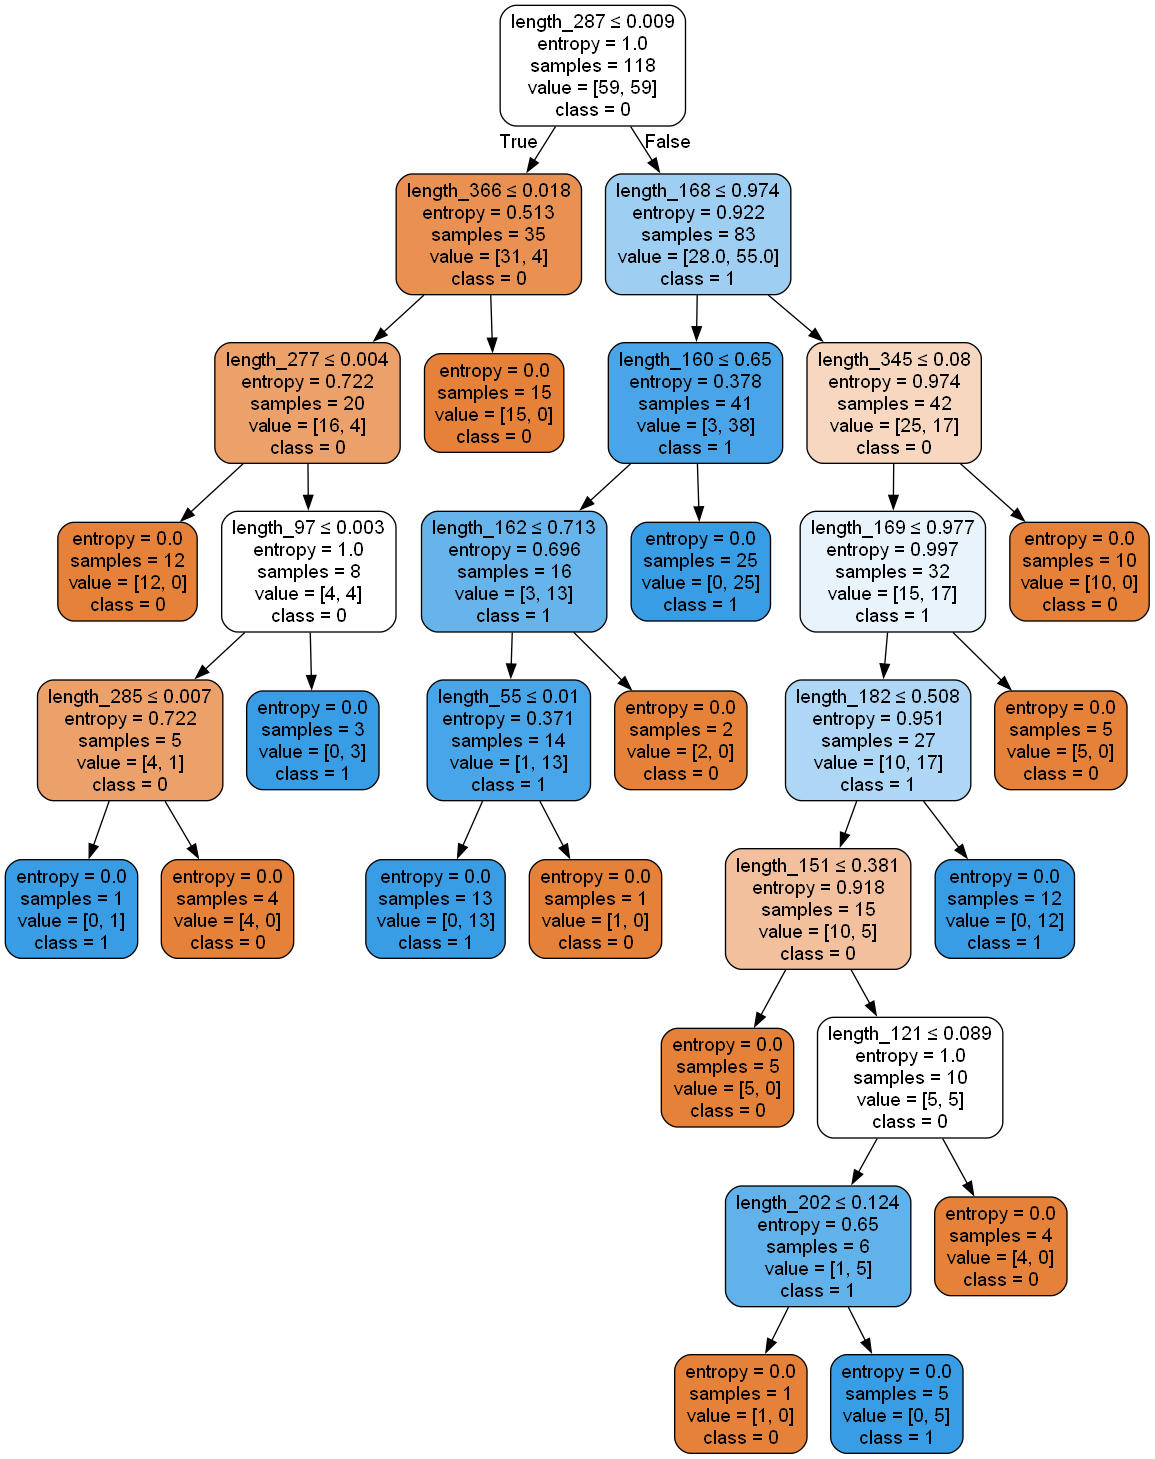

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus


train = pd.read_csv('Train_Set.csv') #, delimiter=',', dtype=None, encoding=None )
column_names = train.columns.tolist()
column_names = column_names[:-1]
#print(column_names)

train['class_label'] = train['class_label'].replace(['healthy', 'early stage cancer', 'screening stage cancer', 'mid stage cancer', 'late stage cancer'], [0, 1, 1, 1, 1])
train_x = train.iloc[1:,:-1]
train_y = train.iloc[1:,-1]
print(train_y)

test = pd.read_csv('Test_Set.csv') #, delimiter = ',', dtype = None, encoding = None)
test['class_label'] = test['class_label'].replace(['healthy', 'early stage cancer', 'screening stage cancer', 'mid stage cancer', 'late stage cancer'], [0, 1, 1, 1, 1])
test_x = test.iloc[1:,:-1 ]
test_y = test.iloc[1:,-1]

undersample = RandomUnderSampler(sampling_strategy = 1)

train_x , train_y = undersample.fit_resample(train_x, train_y)
test_x, test_y = undersample.fit_resample(test_x, test_y)

clf = DecisionTreeClassifier(criterion="entropy")

clf = clf.fit(train_x, train_y)

y_pred = clf.predict(test_x)

print("Accuracy:",metrics.accuracy_score(test_y, y_pred))
print(classification_report(test_y, y_pred))

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = column_names ,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.del_node('"\\n"')
graph.write_png('cancer.png')
Image(graph.create_png())

